# Data Exploration

Hey! During this first step, please, take a look at the data set and just explore it, find the types of each column and try to find interesting things. Don't worry about data cleaning. Just exploration for now.  
You can answer the following questions:
- How many columns there are
- The type of each column
- The different values that a column can take
- Which do you think are the most important columns? If we are looking at the overall score.

Go wild! (Remember, so far, only exploration).


In [157]:
import pandas as pd
import seaborn as sns

In [143]:
# The first thing was to check the data docs at https://www.datos.gov.co/Educaci-n/Saber-11-2019-2/ynam-yc42 
df = pd.read_csv('Saber_11__2019-2.csv')
df.head()

C:\Users\jagiraldo\AppData\Local\Temp\ipykernel_2744\2972959786.py:2: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Saber_11__2019-2.csv')


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,54.0,67,A1,208,25,50.9421557404314,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88,A2,299,83,59.767864431576,3.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,...,64.0,89,A2,299,84,50.7642383644749,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53.0,67,A1,309,88,45.7791353123516,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,...,52.0,63,A1,288,78,52.9109464277177,3.0,3.0,PUBLICAR,NO


## Content exploration

In [144]:
print(f"This dataframe has {df.columns.size} columns")

This dataframe has 82 columns


In [145]:
t = df.dtypes # Indentify columns with mixed types or strings
obj = t[t=="object"]
print(obj.index)

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE',
       'ESTU_TIENEETNIA', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_NOMBRE_ESTAB

In [146]:
t = df.dtypes # Identify columns with numerical data types
num = t[t!="object"]
print(num.index)

Index(['PERIODO', 'COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO',
       'COLE_COD_DANE_SEDE', 'COLE_COD_MCPIO_UBICACION',
       'COLE_COD_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION',
       'ESTU_COD_DEPTO_PRESENTACION', 'PUNT_LECTURA_CRITICA',
       'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA',
       'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS',
       'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES',
       'PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS',
       'DESEMP_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PERCENTIL_INGLES',
       'PUNT_GLOBAL', 'ESTU_NSE_ESTABLECIMIENTO'],
      dtype='object')


## Data cleaning

In [147]:
is_na = df.isna().sum(axis=0) # Check which attributes have missing values
is_na = is_na[is_na != 0]
print(is_na.index)

Index(['ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CARACTER', 'PUNT_INGLES',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL',
       'ESTU_NSE_ESTABLECIMIENTO'],
      dtype='object')


In [148]:
is_na = is_na.sort_values(ascending=False)
print(is_na[is_na>0].head())

ESTU_DEDICACIONINTERNET          30298
FAMI_COMECEREALFRUTOSLEGUMBRE    22332
FAMI_COMELECHEDERIVADOS          22305
FAMI_TIENESERVICIOTV             22280
FAMI_EDUCACIONMADRE              20959
dtype: int64


In [149]:
df = df.drop(is_na[is_na>1000].index, axis=1) # Drop columns with missing data
a = df.isna().sum(axis=1).sort_values(ascending=False) # Check which rows have missing features
print(a[a>0].size)

1149


In [150]:
df = df.drop(a[a>0].index) # Drop rows
df = df.drop(["ESTU_TIPODOCUMENTO", "ESTU_NACIONALIDAD", "PERIODO", "ESTU_CONSECUTIVO", "ESTU_ESTUDIANTE", "ESTU_COD_RESIDE_DEPTO", "ESTU_COD_RESIDE_MCPIO", "COLE_CODIGO_ICFES", "COLE_COD_DANE_ESTABLECIMIENTO", "COLE_COD_DANE_SEDE", "COLE_COD_MCPIO_UBICACION", "COLE_COD_DEPTO_UBICACION", "ESTU_COD_MCPIO_PRESENTACION", "ESTU_COD_DEPTO_PRESENTACION", "ESTU_ESTADOINVESTIGACION"], axis=1)

In [151]:
df["ESTU_FECHANACIMIENTO"] = df["ESTU_FECHANACIMIENTO"].map(lambda x: (x.split(" ")[0]).split("/")[2])

## Exploratory analysis

In [153]:
df["PUNT_GLOBAL"].describe()

count    545063.000000
mean        246.237967
std          51.369556
min           0.000000
25%         207.000000
50%         243.000000
75%         282.000000
max         477.000000
Name: PUNT_GLOBAL, dtype: float64

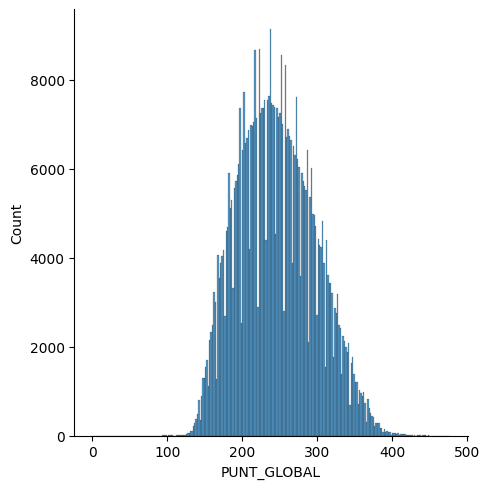

In [158]:
sns.displot(df, x="PUNT_GLOBAL")

In [174]:
g = df.groupby("ESTU_DEPTO_RESIDE")["PUNT_GLOBAL"].mean().sort_values(ascending=False)
print(g)

ESTU_DEPTO_RESIDE
BOGOTÁ             266.484754
SANTANDER          264.133357
BOYACA             261.586032
NORTE SANTANDER    255.336570
CUNDINAMARCA       253.181715
QUINDIO            251.896315
RISARALDA          250.416082
HUILA              250.055421
META               247.935406
CASANARE           246.737062
CALDAS             246.203492
NARIÑO             244.371606
VALLE              242.641871
ANTIOQUIA          241.991230
ATLANTICO          241.618542
ARAUCA             241.151551
TOLIMA             240.871202
CESAR              238.476025
PUTUMAYO           236.593540
SUCRE              235.932649
CORDOBA            235.625518
EXTRANJERO         235.164179
CAQUETA            233.481649
SAN ANDRES         230.227564
CAUCA              228.244633
BOLIVAR            227.604614
VICHADA            225.134538
GUAVIARE           224.062992
GUAINIA            222.820225
MAGDALENA          221.360776
LA GUAJIRA         218.177350
AMAZONAS           213.128797
VAUPES             209

In [176]:
g = df.groupby(["ESTU_DEPTO_RESIDE","ESTU_MCPIO_RESIDE"])["PUNT_GLOBAL"].mean().sort_values(ascending=False)
print(g)

ESTU_DEPTO_RESIDE  ESTU_MCPIO_RESIDE      
SANTANDER          CALIFORNIA                 288.875000
                   PALMAR                     288.300000
                   SAN JOSÉ DE MIRANDA        287.083333
BOYACA             PAIPA                      284.995316
SANTANDER          JORDÁN                     284.750000
                                                 ...    
GUAINIA            SAN FELIPE                 166.066667
CHOCO              EL LITORAL DEL SAN JUAN    163.179856
                   BELÉN DE BAJIRÁ            161.000000
GUAINIA            MORICHAL                   160.250000
CHOCO              ALTO BAUDÓ                 158.686957
Name: PUNT_GLOBAL, Length: 1114, dtype: float64
